In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [21]:
df = pd.read_csv("C:\\Users\\lohit\\Downloads\\Housing (1).csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [37]:
le=LabelEncoder()
df['mainroad']=le.fit_transform(df['mainroad'])
df['guestroom']=le.fit_transform(df['guestroom'])
df['basement']=le.fit_transform(df['basement'])
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])
df['hotwaterheating']=le.fit_transform(df['hotwaterheating'])
df['airconditioning']=le.fit_transform(df['airconditioning'])
df['prefarea']=le.fit_transform(df['prefarea'])

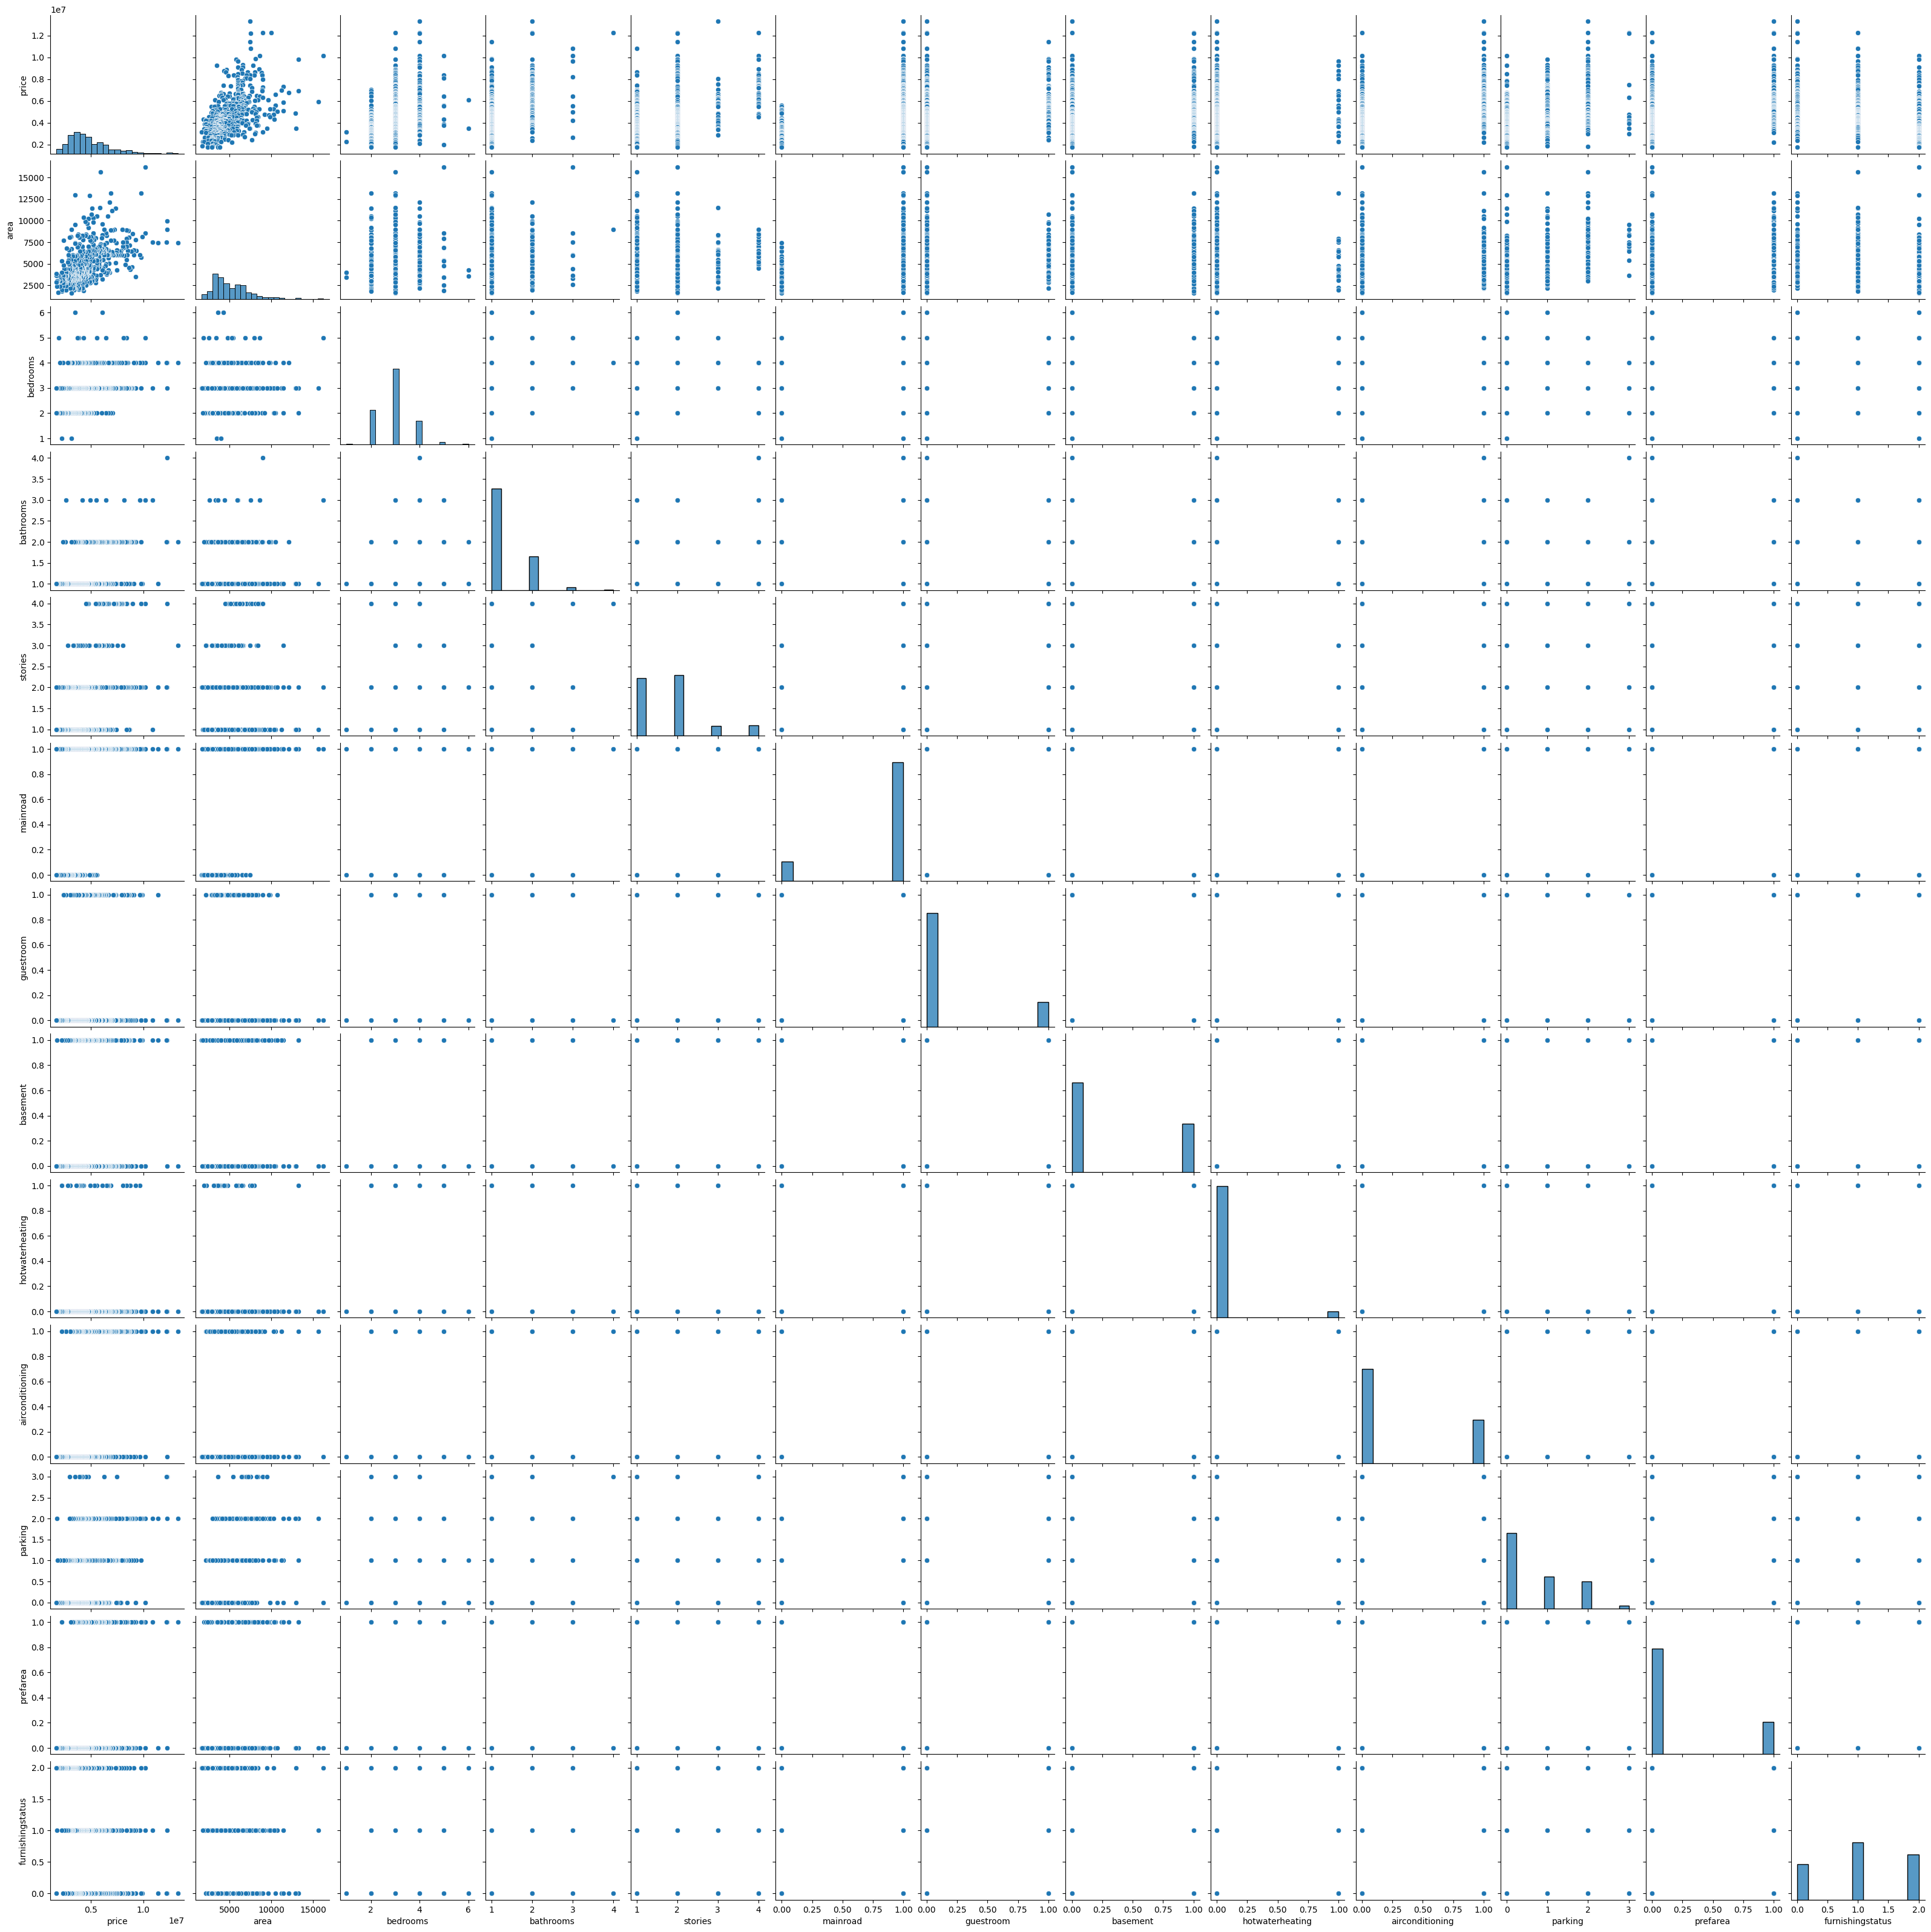

In [38]:
sns.pairplot(df)

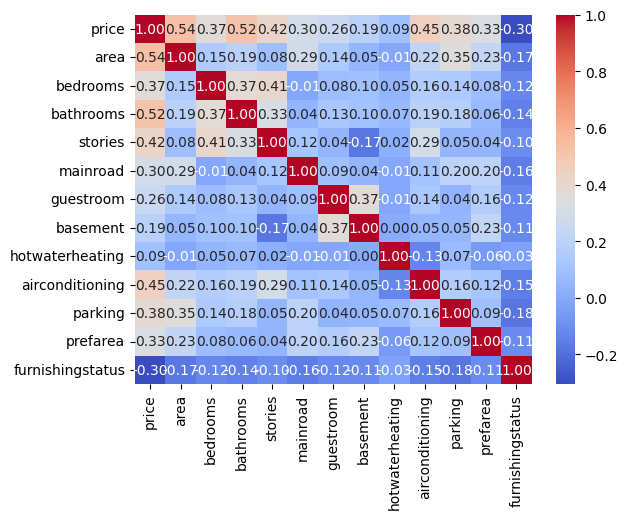

In [39]:
corr_data=df.corr()
sns.heatmap(corr_data,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [40]:
X = df.iloc[:,1:4]
y = df['price']
X,y

(     area  bedrooms  bathrooms
 0    7420         4          2
 1    8960         4          4
 2    9960         3          2
 3    7500         4          2
 4    7420         4          1
 ..    ...       ...        ...
 540  3000         2          1
 541  2400         3          1
 542  3620         2          1
 543  2910         3          1
 544  3850         3          1
 
 [545 rows x 3 columns],
 0      13300000
 1      12250000
 2      12250000
 3      12215000
 4      11410000
          ...   
 540     1820000
 541     1767150
 542     1750000
 543     1750000
 544     1750000
 Name: price, Length: 545, dtype: int64)

In [27]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(x_test)

In [32]:
slope = lr.coef_
intercept = lr.intercept_
print("Slope : ",slope)
print("Intercept : ",intercept)

Slope :  [821359.72637742 278330.71591537 706724.58386061]
Intercept :  4783237.5818337975


In [44]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1024611.4651682046
Mean Squared Error: 1775541617816.701
Root Mean Squared Error: 1332494.5094883884
R-squared: 0.46728860297315067


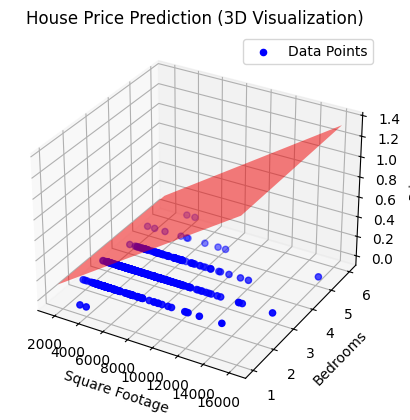

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['area'], df['bedrooms'], y, color='blue', label='Data Points')
x1_range = np.linspace(min(df['area']), max(df['area']), 10)
x2_range = np.linspace(min(df['bedrooms']), max(df['bedrooms']), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)
fixed_age = 10
Y_pred = lr.predict(np.c_[X1.ravel(), X2.ravel(), np.full_like(X1.ravel(), fixed_age)])
Y_pred = Y_pred.reshape(X1.shape)
ax.plot_surface(X1, X2, Y_pred, color='red', alpha=0.5, rstride=100, cstride=100)
ax.set_xlabel('Square Footage')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('House Price Prediction (3D Visualization)')

plt.legend()
plt.show()